# Lab 4

Last time, we worked towards a fully functional k-means. Today, we are going to look at a few issues concerning k-means:
0. Discuss what _Stopping Conditions_ are and how to use them
1. How to use the `sklearn` implementation for k-means
2. How do we decide if we have "good" clusters?

Today we will continue working with our Smith Students data. Please create a copy and place it in this Lab04 folder. Then create the `justtwo` dataframe with just _coffee_ and _sleep_ variables. 

In [1]:
# Package Import block
%matplotlib inline
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
# Import your data
students = pd.read_csv("../Lab03/students_info.csv", sep=",")


# Create your subset
justtwo = students[['coffee','sleep']]
justtwo_np = justtwo.to_numpy()

## Stopping Conditions

Let's start with a few questions about stopping conditions:
   1. What are stopping conditions? 
   2. Why do we care about them?
   3. Why are stopping conditions necessary for k-means?
   
* Write down at least 3 thoughts/ideas/questions about stopping conditions
* Pick at least 1 to share with the class

**Wait here for the group**

For HW2, you will be asked to share your full implementation of k-means, with an explanation of your stopping conditions. 

## `sklearn`

There are several important python packages for doing machine learning, but `sklearn` (or _scikit-learn_) is one of the most powerful. Unlike `numpy`, `pandas`, and `scipy` which serve to be used generally for numerical computations, data wrangling, and scientific computing, respectively, the `sklearn` package is specifically for applying machine learning algorithms to data. The implementations in `sklearn` seek to be optimized and this direct usage is considered to be "off the shelf". 

In this course, we will first program our own version of each algorithm and then switch to using the optimized versions. In a sense `sklearn` becomes our "check" after we have a deeper understanding of each method. 

_Note_ The phrase "off the shelf" refers to the analogy of going to a store and buying something that is designed to just work with little tinkering from the customer. When someone says they used "off the shelf" _method_ they mean that they did not modify the _method_ implementation. 

### k-means in `sklearn`

To use k-means in `sklearn`, there are two steps:
1. Setting up how the k-means will function, including:
   * How many clusters (i.e. the $k$).
   * How you would like the clusters to be selected
   * The starting random state
   * The maximum number of iterations through loop of assigning clusters and finding the centers
2. Applying the k-means you set up to your data

This might seem odd, and perhaps you are wondering why _scikit-learn_ can't do this in one step. I would argue that in fact, this two-step procedure mirrors how we as humans approach coding k-means cold. In fact, note that during the last class, 1) we developed our k-means algorithm and then 2) we applied that code to our dataset. 

In the below code block, we have one possible setting of `KMeans()` from `sklearn`. What _type_ is the output and what information is contained within `km_alg`? 

In [17]:
# Step one: Set up the k-means
km_alg = KMeans(n_clusters=2, init="random",random_state = 1, max_iter = 200)
type(km_alg)

sklearn.cluster.k_means_.KMeans

In [23]:
# Code block for further discovery



Now that we have our k-means set up, we _fit_ it to our data. There are a few ways to [fit data using k-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.fit). In this course we will use `.fit()` and `.predict()`.

#### Using `.fit()`

This first fitting applies k-means to the data. What _type_ is the output and what information is contained within `fit1`?

In [24]:
# Step 2: Apply the set k-means to the data using .fit()
fit1 = km_alg.fit(justtwo_np)

In [ ]:
# Code block for further discovery



It's not immediately obvious how to access the 1) cluster assignments, nor 2) the centers for each cluster. The result of `.fit()` wraps this information inside a class style object. We can use `.labels_` and `.cluster_centers_` to access this information: 

In [26]:
print("Labels\n", out.labels_)

print("\n Cluster Centers \n",out.cluster_centers_)

Labels
 [0 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1
 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0
 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0
 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0
 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1
 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0
 1 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1
 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 1 1 0
 0 1 1 1]

 Cluster Centers 
 [[1.1208     5.164     ]
 [1.21657143 7.20417143]]


#### Using `.predict()`

If we discover more data that we want to compute the cluster label for **after** applying k-means, we can use `.predict()` on that point. For example, say your friend drinks an average of 1 cup of coffee and sleeps for 8 hours per night, which cluster do they belong to?

In [29]:
new_friend_label = km_alg.predict(np.array([[1,2]]))
print(new_friend_label)

[0]


### Plotting our results

Each time we apply a machine learning method, we should evaluate the results. One of the fastest and more visceral ways to do this is by plotting our results. Adapting the visualizations from [this example](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html), we proceed as follows:

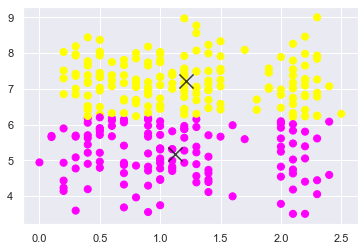

In [38]:
labels = out.labels_
centers = out.cluster_centers_

# Plot and color the points according to their label
plt.scatter(justtwo_np[:,0], justtwo_np[:,1], c=labels, s=50, cmap="spring")
# Add the cluster centers on top
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker="x", s=200, alpha=0.75)


#### Resources Consulted

0. _Python Machine Learning_
1. [k-means helpfile in sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
2. [In Depth: k-Means Clustering](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html)
3. [Colormaps in matplotlib (ie. `cmap`)](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)
4. [Scatter Helpfile](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html)